<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/Test_bootstrap_64%2C64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- importer les bibliothéques

In [ ]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.utils import resample

## 2- fixer les path des données augmenter 

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
sj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped'
sj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_zoom'
sj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation'
sj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_translation'
sj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_distortion'
sj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_distortion'
sj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation_translation'

nsj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped'
nsj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_zoom'
nsj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation'
nsj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_translation'
nsj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_distortion'
nsj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation_translation'

Mounted at /content/drive


In [ ]:
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

## Mise en Forme des images

In [ ]:

def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [ ]:

sj_original=mise_tenseur(sj_path,64,64,1)
nsj_original=mise_tenseur(nsj_path,64,64,1)

In [ ]:
flipped_data= mise_tenseur(sj_fliped, 64, 64,1)
zoom_data=mise_tenseur(sj_zoom,64,64,1)
rotate_data=mise_tenseur(sj_rotation,64,64,1)
translate_data=mise_tenseur(sj_translation,64,64,1)
distortion_data=mise_tenseur(sj_distortion,64,64,1)
flip_dist_data=mise_tenseur(sj_flip_distortion,64,64,1)
rot_trans_flip_data=mise_tenseur(sj_rot_trans_flip,64,64,1)
rot_tran=mise_tenseur(sj_rot_tran,64,64,1)


In [ ]:
sj_data = []
sj_data.extend(rotate_data)
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(translate_data)
sj_data.extend(distortion_data)
sj_data.extend(rot_trans_flip_data)
sj_data.extend(flip_dist_data)
sj_data.extend(rot_tran)

In [ ]:
len(sj_data)

1955

In [ ]:
flipped_data_nsj= mise_tenseur(nsj_fliped, 64, 64,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,64,64,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,64,64,1)
translate_data_nsj=mise_tenseur(nsj_translation,64,64,1)
distortion_data_nsj=mise_tenseur(nsj_distortion,64,64,1)
flip_dist_data_nsj=mise_tenseur(nsj_flip_distortion,64,64,1)
rot_trans_flip_data_nsj=mise_tenseur(nsj_rot_trans_flip,64,64,1)
rot_tran_nsj=mise_tenseur(nsj_rot_tran,64,64,1)


In [ ]:
nsj_data = []
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(rot_trans_flip_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(distortion_data_nsj)
nsj_data.extend(translate_data_nsj)
nsj_data.extend(flip_dist_data_nsj)
nsj_data.extend(rot_tran_nsj)
len(nsj_data)

1980

In [ ]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


3935


3935

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normaliser les données 
x_train = x_train.reshape(x_train.shape[0], 64,64, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 64,64, 1).astype('float32') / 255

In [ ]:
model = Sequential()
model.add(Conv2D(32,(11,11),padding='same',activation='relu', input_shape = (64,64,1)))
model.add(Conv2D(32, kernel_size = (7,7),padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32,padding='same', kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        3904      
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        50208     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)             

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',keras.metrics.Recall(),keras.metrics.Precision()])

In [ ]:
H2 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
99/99 [==============================] - 3s 20ms/step - loss: 0.6682 - accuracy: 0.5804 - recall_2: 0.2920 - precision_2: 0.6821 - val_loss: 0.6038 - val_accuracy: 0.7001 - val_recall_2: 0.7487 - val_precision_2: 0.6791
Epoch 2/100
99/99 [==============================] - 2s 17ms/step - loss: 0.6113 - accuracy: 0.6699 - recall_2: 0.6575 - precision_2: 0.6717 - val_loss: 0.5544 - val_accuracy: 0.7065 - val_recall_2: 0.7744 - val_precision_2: 0.6787
Epoch 3/100
99/99 [==============================] - 2s 17ms/step - loss: 0.5552 - accuracy: 0.7103 - recall_2: 0.6901 - precision_2: 0.7167 - val_loss: 0.5211 - val_accuracy: 0.7382 - val_recall_2: 0.7769 - val_precision_2: 0.7180
Epoch 4/100
99/99 [==============================] - 2s 17ms/step - loss: 0.5345 - accuracy: 0.7335 - recall_2: 0.7157 - precision_2: 0.7398 - val_loss: 0.5382 - val_accuracy: 0.7217 - val_recall_2: 0.8436 - val_precision_2: 0.6756
Epoch 5/100
99/99 [==============================] - 2s 20ms/step - loss

## Matrice de confusion de train


25/25 [==============================] - 0s 4ms/step


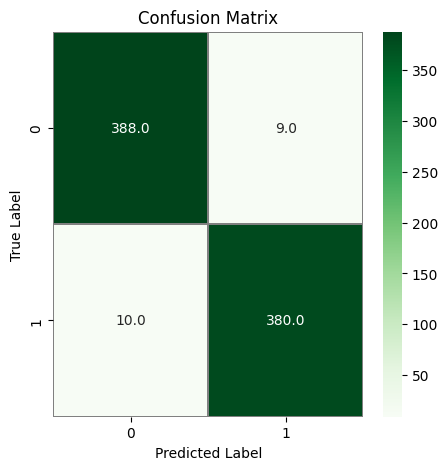

[[388   9]
 [ 10 380]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Générer des prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.where(y_pred>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       397
           1       0.98      0.97      0.98       390

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787



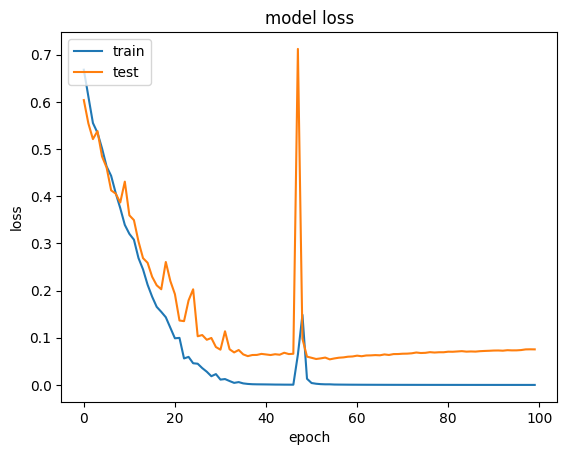

In [ ]:
#loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# bootstrap

In [ ]:
# diviser la base en 2
nsj_org_data=nsj_original
sj_org_data=sj_original
label_nsj = [0] * len(nsj_org_data)  # labels pour la première classe (0)
label_sj = [1] * len(sj_org_data)  # labels pour la deuxième classe (1)
# Fusionner les données et les labels en un seul tableau multidimensionnel
data2 = np.concatenate([nsj_org_data, sj_org_data])
print(len(data2))
labels2 = np.concatenate([label_nsj, label_sj])
len(labels2)


225


225

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Définir le nombre d'itérations de bootstrap
n_iterations = 1000

# Initialiser les listes pour stocker les mesures de performance
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
lrs_plus = []
lrs_moins = []

# Boucle pour effectuer les itérations de bootstrap
for i in range(n_iterations):
    # Créer un nouvel échantillon bootstrap en tirant au hasard avec remplacement
    X_sample, y_sample = resample(data2,labels2,random_state=42)
    #evaluer le modele 
    y_pred = model.predict(X_sample)
    y_pred_classes = np.where(y_pred>0.5,1.,0)

    
    # calculer les métriques d'évaluation
    accuracy = accuracy_score(y_sample, y_pred_classes)
    precision = precision_score(y_sample, y_pred_classes)
    recall = recall_score(y_sample, y_pred_classes)
    f1 = f1_score(y_sample, y_pred_classes)

    # calculer la matrice de confusion pour calculer lr+ et lr-
    tn, fp, fn, tp = confusion_matrix(y_sample, y_pred_classes).ravel()
    lr_plus = tp / (tp + fp)
    lr_moins = fn / (fn + tn)

    # Stocker les mesures de performance pour l'itération actuelle
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    lrs_plus.append(lr_plus)
    lrs_moins.append(lr_moins)


8/8 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


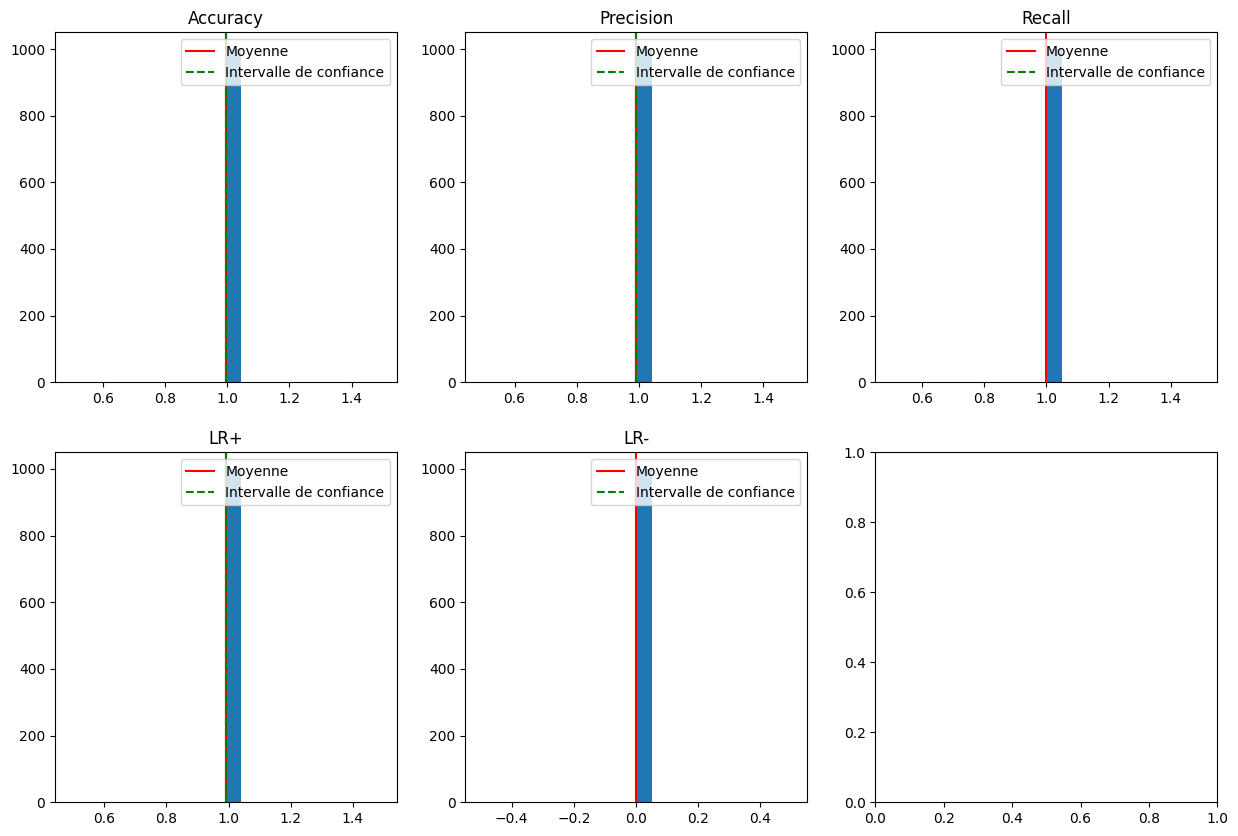

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

# métriques +scores
metrics = ['Accuracy', 'Precision', 'Recall', 'LR+', 'LR-']
scores = [accuracy_scores, precision_scores, recall_scores, lrs_plus, lrs_moins]

for i in range(len(metrics)):
    # calculer l'intervalle de confiance à 95 % pour chaque métrique
    conf_interval = stats.t.interval(0.95, len(scores[i])-1, loc=np.mean(scores[i]), scale=stats.sem(scores[i]))
    
    # tracer l'histogramme avec l'intervalle de confiance
    axs[i].hist(scores[i], bins=20)
    axs[i].axvline(np.mean(scores[i]), color='red', label='Moyenne')
    axs[i].axvline(conf_interval[0], color='green', linestyle='--', label='Intervalle de confiance')
    axs[i].axvline(conf_interval[1], color='green', linestyle='--')
    axs[i].set_title(metrics[i])
    axs[i].legend()

# afficher le graphique
plt.show()
